In [159]:
import numpy as np
import pandas as pd
df = pd.read_csv("laptop_data.csv")

In [160]:
df.head()    #To show the first 5 columns of the data set

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [161]:
df.describe()    # This shows the stats of all the numerical values

,Unnamed: 0,Inches,Price
count,1306.000000,1306.000000,1306.000000
mean,649.690658,15.013017,59912.258499
std,376.885737,1.424616,37304.220229
min,0.000000,10.100000,9270.720000
25%,323.250000,14.000000,31914.720000
50%,649.500000,15.600000,52054.560000
75%,975.750000,15.600000,79373.746800
max,1302.000000,18.400000,324954.720000


In [162]:
df.shape

(1306, 12)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1306 non-null   int64  
 1   Company           1306 non-null   object 
 2   TypeName          1306 non-null   object 
 3   Inches            1306 non-null   float64
 4   ScreenResolution  1306 non-null   object 
 5   Cpu               1306 non-null   object 
 6   Ram               1301 non-null   object 
 7   Memory            1306 non-null   object 
 8   Gpu               1306 non-null   object 
 9   OpSys             1306 non-null   object 
 10  Weight            1306 non-null   object 
 11  Price             1306 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.6+ KB


DATA CLEANING


In [164]:
df.duplicated().sum() #To find the duplicate values

9

In [165]:
df.drop_duplicates(inplace=True) #To drop the duplicate values

In [166]:
df.duplicated().sum()

0

In [167]:
mode_ram = df['Ram'].mode()[0]   # Calculating mode

In [168]:
mode_ram

'8GB'

In [169]:
df['Ram'].fillna(mode_ram, inplace=True)

In [170]:
df.isnull().sum()  # Null values are replaced by mode

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Data preprocessing


In [171]:
df.drop(columns=['Unnamed: 0'], inplace=True) #Dropping Unnamed: 0 column becuase it is not needed.

In [172]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [173]:
df['Ram'] = df['Ram'].str.replace('GB','')  #To remove 'GB' from Ram column

In [174]:
df['Weight'] = df['Weight'].str.replace('kg','') #To remove 'kg' from Ram column

In [175]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [176]:
df['Ram'] = df['Ram'].astype('int32') #Changing the datatypes

In [177]:
df['Weight'] = df['Weight'].astype('float32')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 0 to 1305
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1297 non-null   object 
 1   TypeName          1297 non-null   object 
 2   Inches            1297 non-null   float64
 3   ScreenResolution  1297 non-null   object 
 4   Cpu               1297 non-null   object 
 5   Ram               1297 non-null   int32  
 6   Memory            1297 non-null   object 
 7   Gpu               1297 non-null   object 
 8   OpSys             1297 non-null   object 
 9   Weight            1297 non-null   float32
 10  Price             1297 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 111.5+ KB


In [179]:
df.describe()    # Found outliers in Weight

,Inches,Ram,Weight,Price
count,1297.000000,1297.000000,1297.000000,1297.000000
mean,15.013647,8.390131,2.806654,59924.888938
std,1.425709,5.091038,27.718493,37296.015690
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79387.200000
max,18.400000,64.000000,1000.000000,324954.720000


Removing outliers

In [180]:
Q1 = df.Weight.quantile(0.0)  # Choosing 0 after trial and testing of range
Q3 = df.Weight.quantile(0.75)

In [181]:
Q1

0.6899999976158142

In [182]:
Q3

2.299999952316284

In [183]:
IQR = Q3-Q1

In [184]:
IQR

1.60999995470047

In [185]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.7249999344348907, 4.714999884366989)

In [186]:
df[(df.Weight<lower_limit) | (df.Weight>upper_limit)]  #To find the outliers

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
306,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,1000.0,29250.72


In [187]:
df = df[(df.Weight>lower_limit)&(df.Weight<upper_limit)] # To remove the outliers
df.describe()

,Inches,Ram,Weight,Price
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,15.013194,8.390432,2.037215,59948.557278
std,1.426166,5.092992,0.665834,37300.667342
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52107.840000
75%,15.600000,8.000000,2.300000,79424.496000
max,18.400000,64.000000,4.700000,324954.720000


Exploratory Data Analysis

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-189-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

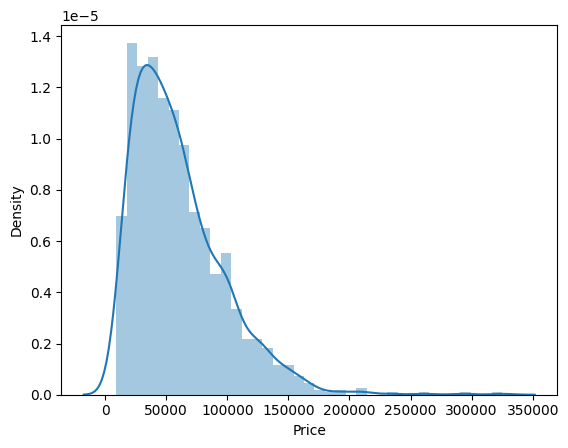

In [189]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

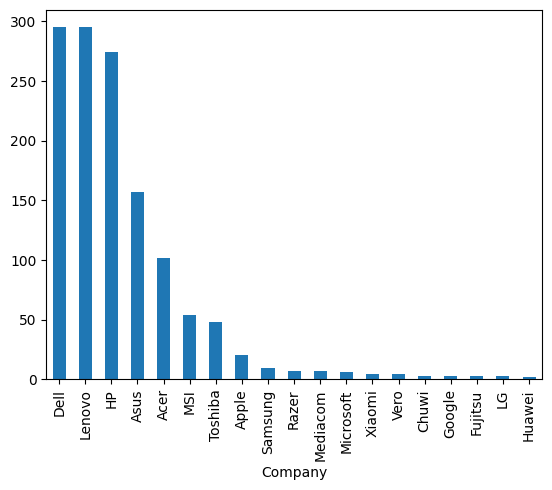

In [190]:
df['Company'].value_counts().plot(kind='bar') #To show the count of laptop of each brand.

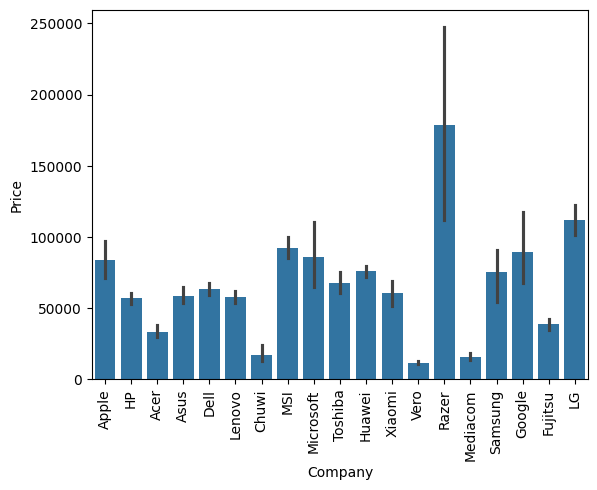

In [191]:
sns.barplot(x=df['Company'], y=df['Price']) # To find which laptops are costly and which one are budget laptops.
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

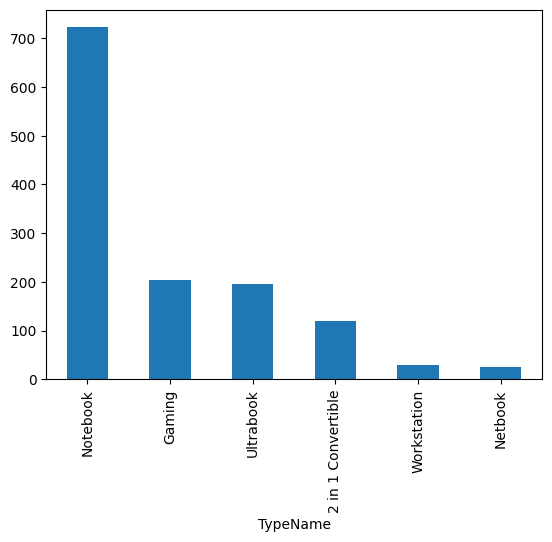

In [192]:
df['TypeName'].value_counts().plot(kind='bar') #To find the count of

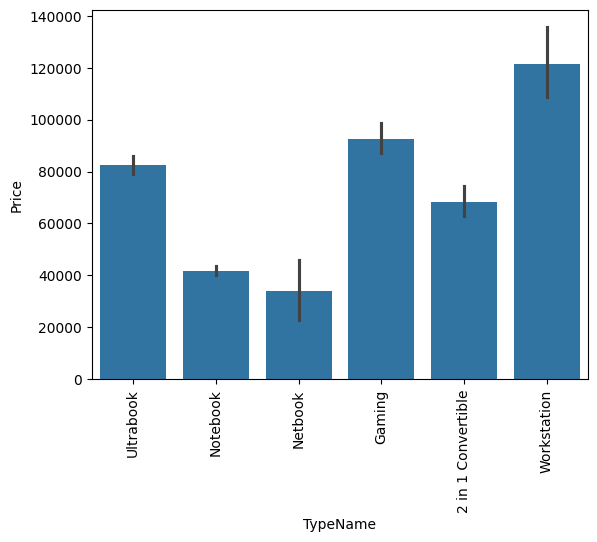

In [193]:
sns.barplot(x=df['TypeName'], y=df['Price']) # To find which type of laptops are costly and which one are budget laptops.
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-194-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

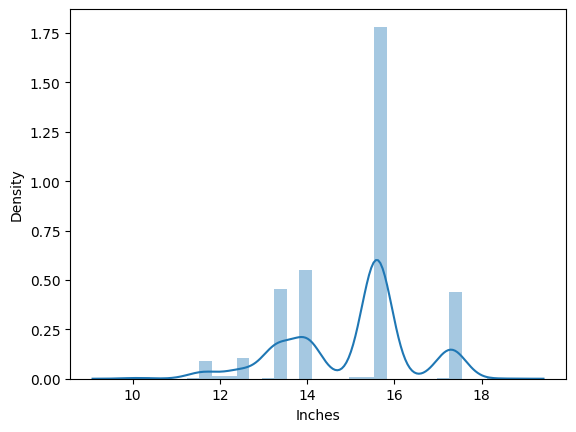

In [194]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

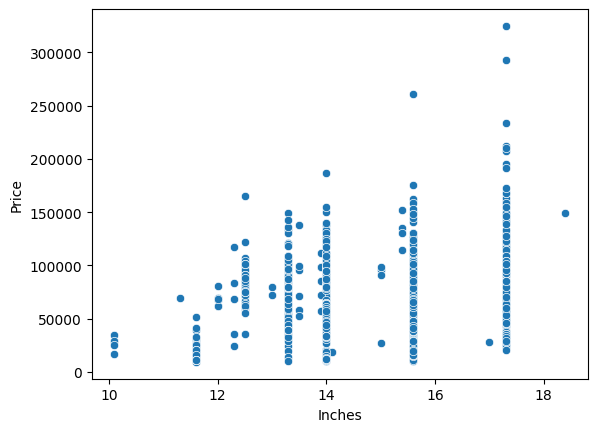

In [195]:
sns.scatterplot(x=df['Inches'], y=df['Price']) #To check the relation between Inches and price

In [196]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0) #To create a new column named 'Touchscreen' if the word is present.

In [197]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

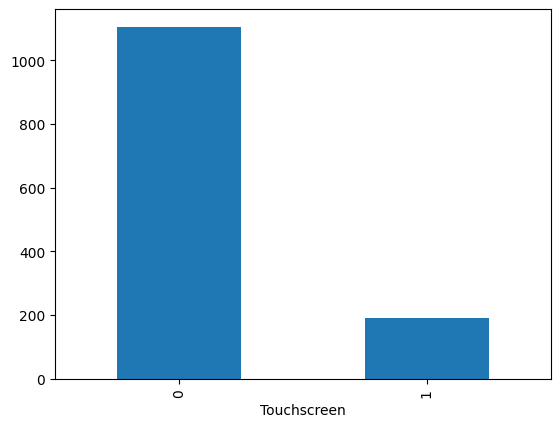

In [198]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

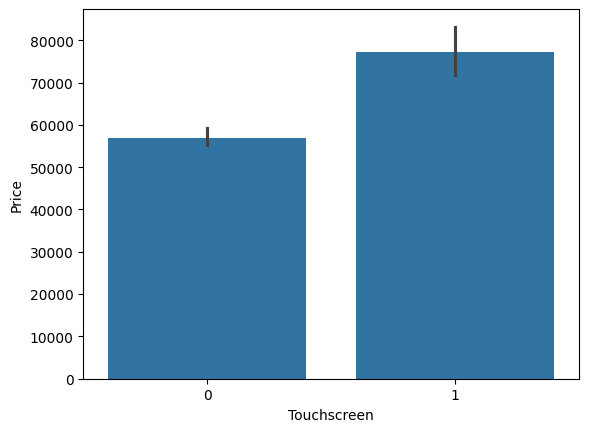

In [199]:
sns.barplot(x=df['Touchscreen'], y=df['Price']) #To show the relation between Touchscreen and Price

In [200]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='IPS', ylabel='Price'>

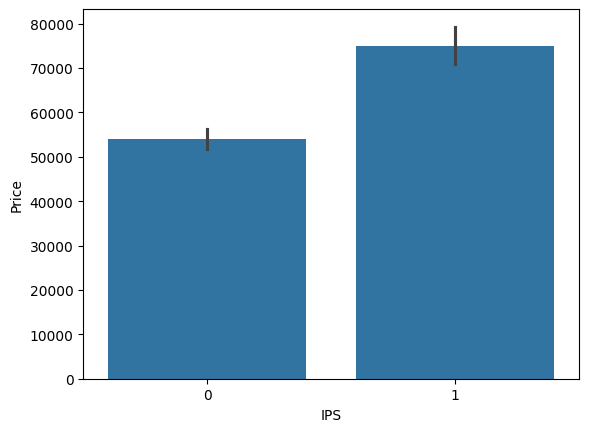

In [201]:
sns.barplot(x=df['IPS'], y=df['Price']) #To show the relation between IPS and Price

In [202]:
temp = df['ScreenResolution'].str.split('x',n=1,expand=True)

'x': This is the delimiter used for splitting the strings.

n=1: This parameter indicates that only the first occurrence of the delimiter should be used for splitting. This means
if there are multiple occurrences of 'x' in a string, only the first one will be considered for splitting.

expand=True: This parameter tells pandas to expand the split strings into separate columns. Each part of the split string will be placed into a separate column in the resulting DataFrame.

In [203]:
df['X_res']= temp[0]
df['Y_res'] = temp[1]

In [204]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,IPS Panel Retina Display 2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,Full HD 1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,IPS Panel Full HD 1920,1080


In [205]:
df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)') # The output is an array

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1301    [1920]
1302    [3200]
1303    [1366]
1304    [1366]
1305    [1366]
Name: X_res, Length: 1296, dtype: object

Putting it all together, the pattern (\d+\.?\d+) matches sequences of one or more digits, optionally followed by a dot, and then followed by one or more digits. This pattern is commonly used to extract numerical values (possibly with decimal points) from strings.

In [206]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]) #Applied Lambda function to return the 0th value of the array

In [207]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1920,1080


In [208]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1305
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1296 non-null   object 
 1   TypeName          1296 non-null   object 
 2   Inches            1296 non-null   float64
 3   ScreenResolution  1296 non-null   object 
 4   Cpu               1296 non-null   object 
 5   Ram               1296 non-null   int32  
 6   Memory            1296 non-null   object 
 7   Gpu               1296 non-null   object 
 8   OpSys             1296 non-null   object 
 9   Weight            1296 non-null   float32
 10  Price             1296 non-null   float64
 11  Touchscreen       1296 non-null   int64  
 12  IPS               1296 non-null   int64  
 13  X_res             1296 non-null   int32  
 14  Y_res             1296 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 141.8+ KB


In [210]:
df.shape

(1296, 15)

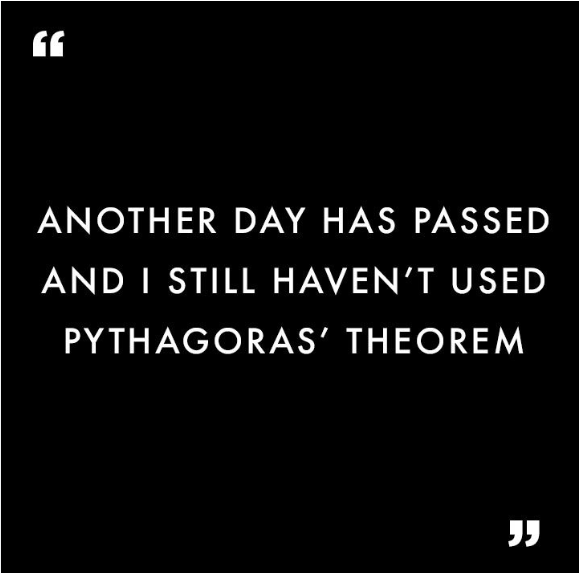

PPI is a measure of pixel density or resolution of a computer screen, television screen or other display device.

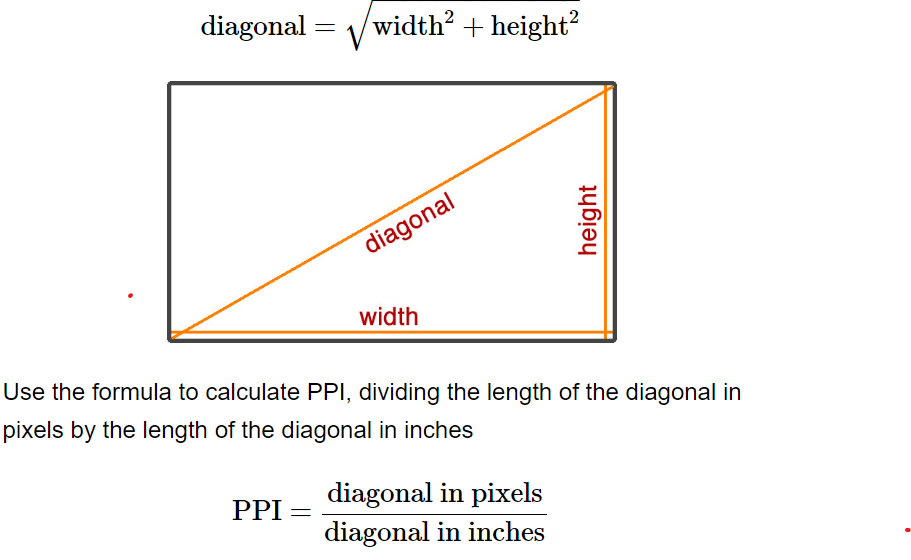

In [211]:
df['ppi'] = (((df['X_res']**2)+(df['Y_res'])**2)**0.5/df['Inches']).astype('float')


In [212]:
df.drop(columns=['ScreenResolution','X_res','Y_res', 'Inches'], inplace=True)

In [213]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [214]:
df['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1301              Intel Core i7 6500U 2.5GHz
1302              Intel Core i7 6500U 2.5GHz
1303    Intel Celeron Dual Core N3050 1.6GHz
1304              Intel Core i7 6500U 2.5GHz
1305    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1296, dtype: object

In [215]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))    # To get the first three words

In [216]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1301         Intel Core i7
1302         Intel Core i7
1303    Intel Celeron Dual
1304         Intel Core i7
1305    Intel Celeron Dual
Name: Cpu Name, Length: 1296, dtype: object

In [217]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i3' or text == 'Intel Core i5':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'


In [218]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [219]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

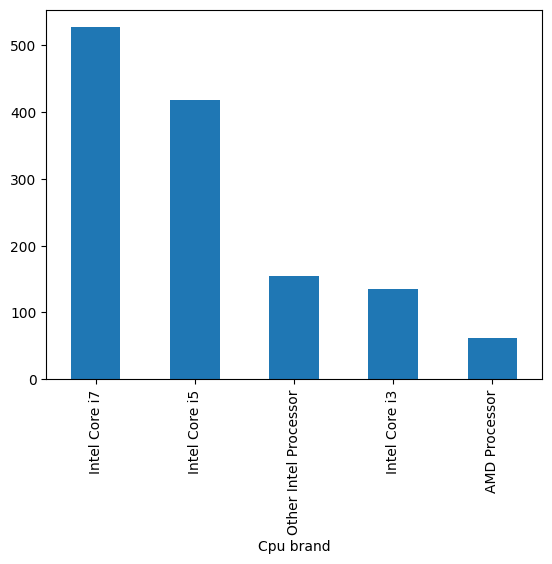

In [220]:
df['Cpu brand'].value_counts().plot(kind='bar')

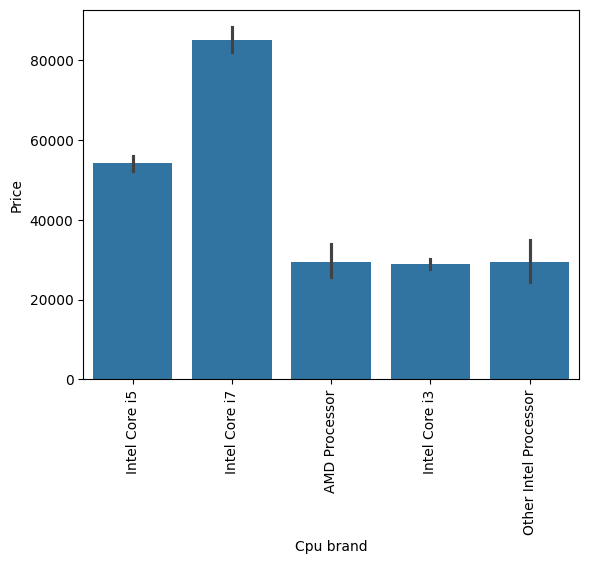

In [221]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [222]:
df.drop(columns=['Cpu','Cpu Name'], inplace=True) # Dropping the CPU and Cpu Name column because we have created a new column Cpu brand

In [223]:
df.drop(columns=['Memory'], inplace=True)

In [224]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [225]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD Radeon R7 M445', 'AMD Radeon RX 550',
       'Nvidia GeF

In [226]:
df['Gpu'].apply(lambda x:x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1301    Intel
1302    Intel
1303    Intel
1304      AMD
1305    Intel
Name: Gpu, Length: 1296, dtype: object

In [227]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [228]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


In [229]:
df.drop(columns=['Gpu'], inplace=True)  # Drop the GPU column

In [230]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel


<Axes: xlabel='Gpu brand', ylabel='Price'>

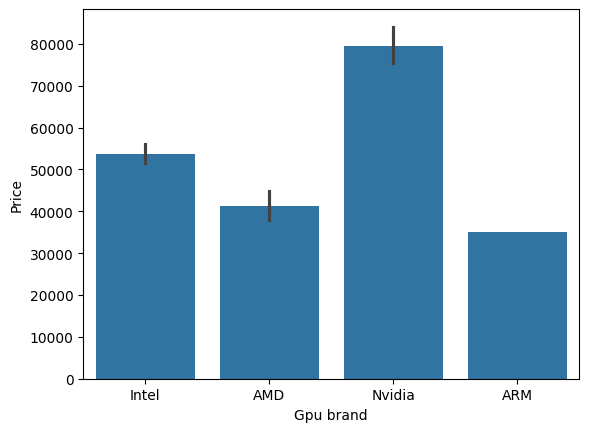

In [231]:
sns.barplot(x=df['Gpu brand'], y=df['Price'])

In [232]:
df['OpSys'].value_counts()

OpSys
Windows 10      1068
No OS             64
Linux             62
Windows 7         45
Chrome OS         27
macOS             12
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [233]:
def cat_os(input):    # cat_os means category of OS
  if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10 S':
    return 'Windows'
  elif input == 'macOS' or input == 'Mac OS X':
    return 'Mac'
  else:
    return 'Other OS/Linux/No OS'

In [234]:
df['os'] = df['OpSys'].apply(cat_os)

In [235]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Other OS/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [236]:
df.drop(columns=['OpSys'], inplace=True)

In [237]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Other OS/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


<Axes: xlabel='os', ylabel='Price'>

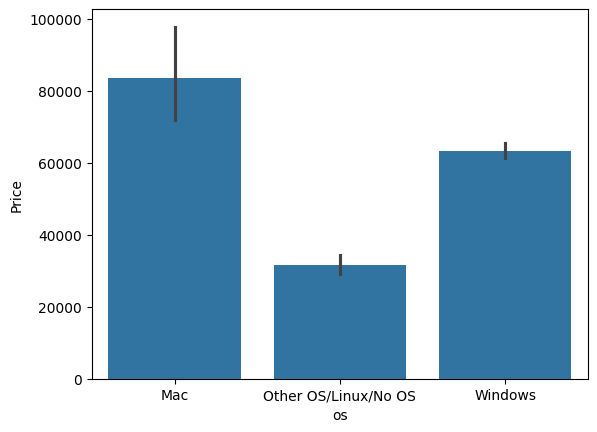

In [238]:
sns.barplot(x=df['os'], y=df['Price'])

Weight

<ipython-input-239-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

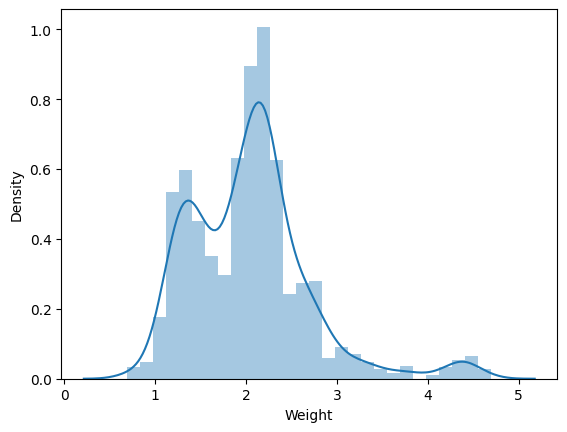

In [239]:
sns.distplot(df['Weight'])

In [240]:
df.dtypes

Company         object
TypeName        object
Ram              int32
Weight         float32
Price          float64
Touchscreen      int64
IPS              int64
ppi            float64
Cpu brand       object
Gpu brand       object
os              object
dtype: object

<ipython-input-241-0a9ec3ba582e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])       # We can see the graph is skewed


<Axes: xlabel='Price', ylabel='Density'>

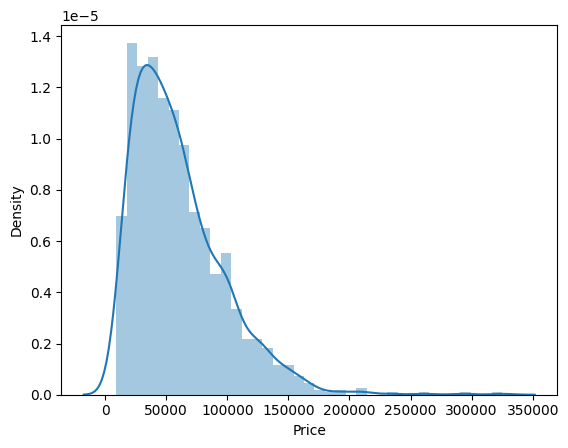

In [241]:
sns.distplot(df['Price'])       # We can see the graph is skewed

<ipython-input-242-cfba2a5ffa37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))   # Normalized graph


<Axes: xlabel='Price', ylabel='Density'>

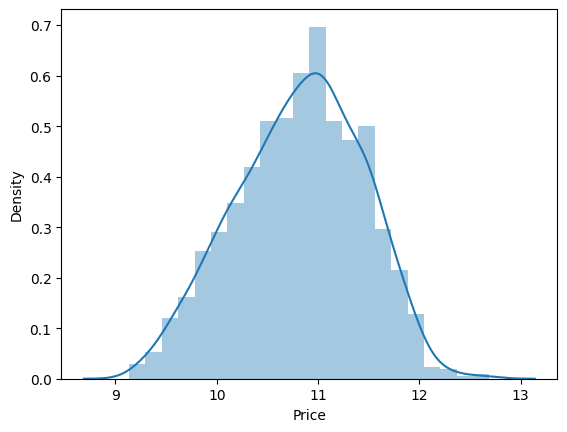

In [242]:
sns.distplot(np.log(df['Price']))   # Normalized graph

In [243]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])     # To normalise the data

In [244]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel,Other OS/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...
1301,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,Intel,Windows
1302,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,Intel,Windows
1303,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,Intel,Windows
1304,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,AMD,Windows


In [245]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1301    10.433899
1302    11.288115
1303     9.409283
1304    10.614129
1305     9.886358
Name: Price, Length: 1296, dtype: float64

In [246]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [247]:
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'])

<Axes: >

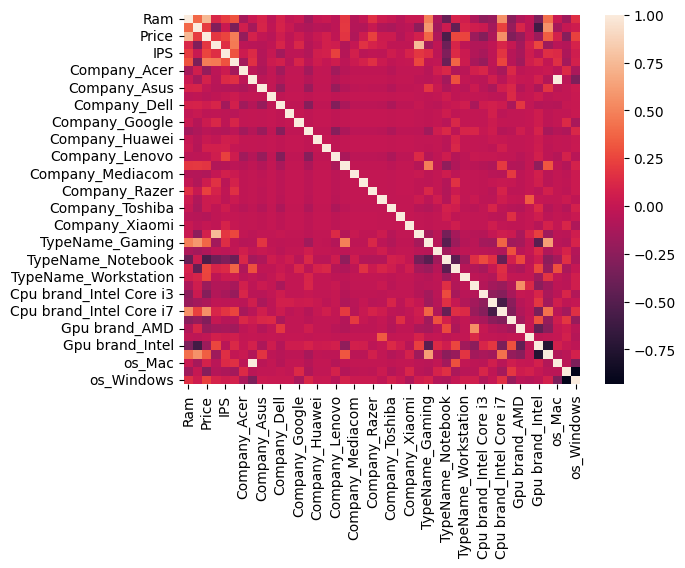

In [260]:
sns.heatmap(df_encoded.corr())

In [248]:
df_encoded

,Ram,Weight,Price,Touchscreen,IPS,ppi,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_ARM,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Other OS/Linux/No OS,os_Windows
0,8,1.37,71378.6832,0,1,226.983005,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
1,8,1.34,47895.5232,0,0,127.677940,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
2,8,1.86,30636.0000,0,0,141.211998,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
3,16,1.83,135195.3360,0,1,220.534624,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False
4,8,1.37,96095.8080,0,1,226.983005,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,4,1.80,33992.6400,1,1,157.350512,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1302,16,1.30,79866.7200,1,1,276.053530,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1303,2,1.50,12201.1200,0,0,111.935204,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1304,6,2.19,40705.9200,0,0,100.454670,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [249]:
df_encoded.columns

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'Company_Acer',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Cpu brand_AMD Processor', 'Cpu brand_Intel Core i3',
       'Cpu brand_Intel Core i5', 'Cpu brand_Intel Core i7',
       'Cpu brand_Other Intel Processor', 'Gpu brand_AMD', 'Gpu brand_ARM',
       'Gpu brand_Intel', 'Gpu brand_Nvidia', 'os_Mac',
       'os_Other OS/Linux/No OS', 'os_Windows'],
      dtype='object')

In [250]:
X = df_encoded.drop('Price', axis=1)  # 'Price' is your target variable
y = np.log(df_encoded['Price'])

In [251]:
X

,Ram,Weight,Touchscreen,IPS,ppi,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_ARM,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Other OS/Linux/No OS,os_Windows
0,8,1.37,0,1,226.983005,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
1,8,1.34,0,0,127.677940,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
2,8,1.86,0,0,141.211998,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
4,8,1.37,0,1,226.983005,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,4,1.80,1,1,157.350512,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1302,16,1.30,1,1,276.053530,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1303,2,1.50,0,0,111.935204,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1304,6,2.19,0,0,100.454670,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [252]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1301    10.433899
1302    11.288115
1303     9.409283
1304    10.614129
1305     9.886358
Name: Price, Length: 1296, dtype: float64

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [255]:
y_pred = rf_model.predict(X_test)

In [256]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05299513432325618


In [257]:
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.23020672084727714


In [258]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.8570143929282722
